# Stream of Consciousness Data Exploration

In [27]:
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns
%matplotlib inline

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
col_desc = pd.read_csv("../data/column_desc.tsv", delimiter="\t")

In [30]:
col_desc

,name,desc
0,PatientIdentifier,unique patient id
1,bhr,basal heart rate
2,basebp,basal blood pressure
3,basedp,basal double product (= bhr x basebp)
4,pkhr,peak heart rate
5,sbp,systolic blood pressure
6,dp,double product (= pkhr x sbp)
7,maxhr,maximum heart rate
8,pctMphr,% of maximum predicted heart rate achieved
9,mbp,maximum blood pressure


In [31]:
d = pd.read_csv("../data/data.csv")

In [32]:
d.index = d['PatientIdentifier']

In [33]:
d = d.drop(columns=['PatientIdentifier'])

What is the distribution of each of the numeric columns?

In [34]:
d.describe()

,bhr,basebp,basedp,pkhr,sbp,dp,maxhr,pctMphr,mbp,dpmaxdo,dobdose,age,baseEF,chestpain,restwma,posSE,newMI,newPTCA,newCABG,death,hxofHT,hxofDM,hxofMI,hxofPTCA,hxofCABG,any.event
count,556.000000,556.000000,543.000000,555.000000,540.000000,540.000000,545.000000,534.000000,541.000000,552.000000,548.000000,539.000000,540.000000,548.000000,549.000000,539.000000,558.000000,558.000000,558.000000,540.000000,541.000000,556.000000,552.000000,539.000000,553.000000,550.000000
mean,74.519784,135.293165,10223.066298,120.643243,147.035185,17653.733333,119.306422,78.561798,155.615527,18547.702899,30.237226,68.834879,55.511111,0.304745,0.460838,0.244898,0.050179,0.048387,0.059140,0.040741,0.706100,0.370504,0.277174,0.076067,0.159132,0.161818
std,17.622200,20.799567,2588.827924,22.584033,36.682824,5242.508552,22.014694,15.227201,31.699341,4912.162667,9.543431,16.255986,10.420913,0.460720,0.498919,0.430426,0.218510,0.214775,0.236098,0.197872,0.455968,0.483375,0.448009,0.265351,0.366130,0.368619
min,-42.000000,85.000000,5000.000000,52.000000,40.000000,5100.000000,58.000000,38.000000,84.000000,7130.000000,5.000000,26.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,120.000000,8426.000000,106.500000,120.000000,14039.000000,104.000000,69.000000,133.000000,15257.250000,20.000000,60.500000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.000000,133.000000,9860.000000,122.000000,142.000000,17090.000000,120.000000,78.000000,150.000000,18118.000000,30.000000,69.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84.000000,150.000000,11698.000000,135.500000,170.000000,20648.250000,133.000000,89.000000,175.000000,21259.000000,40.000000,76.000000,62.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,210.000000,203.000000,27300.000000,210.000000,309.000000,45114.000000,200.000000,133.000000,309.000000,45114.000000,40.000000,167.000000,83.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


What does the data look like?

In [35]:
d.head()

,bhr,basebp,basedp,pkhr,sbp,dp,maxhr,pctMphr,mbp,dpmaxdo,dobdose,age,gender,baseEF,chestpain,restwma,posSE,newMI,newPTCA,newCABG,death,hxofHT,hxofDM,hxofCig,hxofMI,hxofPTCA,hxofCABG,any.event,ecg
PatientIdentifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5b58e040ee35f3bcc6023fb7836c842e,92.0,103.0,9476.0,114.0,86.0,9804.0,100.0,NaN,121.0,12100.0,40.0,85.0,male,27.0,0.0,0.0,0.0,0,0,0,0.0,NaN,0.0,non-smoker,1.0,1.0,0.0,0.0,normal
0e4033b8c0b56afbea35dc749ced4e1d,62.0,139.0,8618.0,120.0,158.0,18960.0,120.0,82.0,158.0,18960.0,40.0,73.0,male,39.0,0.0,0.0,0.0,1,0,0,0.0,NaN,1.0,non-smoker,1.0,0.0,0.0,1.0,equivocal
d19d62a873f08af0488f0df720cfd293,62.0,139.0,8618.0,120.0,157.0,18840.0,120.0,82.0,157.0,18840.0,40.0,73.0,male,39.0,0.0,0.0,NaN,1,0,0,NaN,0.0,1.0,non-smoker,1.0,0.0,0.0,1.0,equivocal
00713fac580bcb0691658403f8e6f4e3,93.0,118.0,10974.0,118.0,105.0,12390.0,118.0,72.0,105.0,12390.0,30.0,57.0,female,42.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,non-smoker,0.0,0.0,0.0,0.0,normal
ee340e888492be0703f2bcc9abfb390c,89.0,103.0,9167.0,129.0,173.0,22317.0,129.0,69.0,176.0,22704.0,40.0,34.0,male,45.0,1.0,1.0,0.0,0,0,0,0.0,0.0,0.0,non-smoker,0.0,0.0,NaN,0.0,equivocal


Are there missing targets?

In [37]:
d[d['any.event'].isna()][['any.event','death','newMI','newPTCA','newCABG']]

,any.event,death,newMI,newPTCA,newCABG
PatientIdentifier,,,,,
f6b9c2fe4db50a55677c03b28660cc8e,NaN,0.0,0,0,0
df2dab53029dc33ee095dc61300856dc,NaN,0.0,0,0,0
a9eae19640f29661b5b4335e65a9c80f,NaN,0.0,0,0,0
3648d42ead0d65748a3b079de4bbb53b,NaN,0.0,0,0,0
99c49e1fd1fa48b12af3db371b6749aa,NaN,0.0,0,0,0
37c07858edda99de0be4fe17d25cc152,NaN,0.0,0,0,0
43d4f59692072aafa464d3c827a72457,NaN,0.0,0,0,0
a7c318ba712c252375587db5c136bb3a,NaN,0.0,0,0,0


In the case of missing targets the `any.event` should be `0`, which is also the mode of the columns.

In [38]:
d.shape

(558, 29)

The 30th column is the PatientIdentifier which I cast as the index.

### Attribution plan:

- bhr - mean
- basebp - mean
- basedp - bhr*basebp
- pkhr
- sbp
- dp - pkhr * sbp
- maxhr - mean

- chestpain - mostpopular
- restwma - mostpopular
- 
...
geneerally numeric gets mean and categorical gets mode

In [39]:
d.dtypes

bhr          float64
basebp       float64
basedp       float64
pkhr         float64
sbp          float64
dp           float64
maxhr        float64
pctMphr      float64
mbp          float64
dpmaxdo      float64
dobdose      float64
age          float64
gender        object
baseEF       float64
chestpain    float64
restwma      float64
posSE        float64
newMI          int64
newPTCA        int64
newCABG        int64
death        float64
hxofHT       float64
hxofDM       float64
hxofCig       object
hxofMI       float64
hxofPTCA     float64
hxofCABG     float64
any.event    float64
ecg           object
dtype: object

## Notes

1. Check for missing values
2. How to impute values?
3. Which colums are categorical / numeric?


In [40]:
d.index.nunique()

558

Which columns have missing data?

In [41]:
d.isna().any()

bhr           True
basebp        True
basedp        True
pkhr          True
sbp           True
dp            True
maxhr         True
pctMphr       True
mbp           True
dpmaxdo       True
dobdose       True
age           True
gender       False
baseEF        True
chestpain     True
restwma       True
posSE         True
newMI        False
newPTCA      False
newCABG      False
death         True
hxofHT        True
hxofDM        True
hxofCig      False
hxofMI        True
hxofPTCA      True
hxofCABG      True
any.event     True
ecg          False
dtype: bool

In [42]:
d.shape

(558, 29)

How many rows are intact?

In [43]:
d.dropna().shape

(346, 29)

What does the distribution of each feature look like?

Histogram of float64 bhr
Histogram of float64 basebp
Histogram of float64 basedp
Histogram of float64 pkhr
Histogram of float64 sbp
Histogram of float64 dp
Histogram of float64 maxhr
Histogram of float64 pctMphr
Histogram of float64 mbp
Histogram of float64 dpmaxdo
Histogram of float64 dobdose
Histogram of float64 age
Col gender has 2 unique values.
Histogram of float64 baseEF
Histogram of float64 chestpain
Histogram of float64 restwma
Histogram of float64 posSE
Histogram of int64 newMI
Histogram of int64 newPTCA
Histogram of int64 newCABG
Histogram of float64 death
Histogram of float64 hxofHT
Histogram of float64 hxofDM
Col hxofCig has 3 unique values.
Histogram of float64 hxofMI
Histogram of float64 hxofPTCA
Histogram of float64 hxofCABG


/Users/william/miniconda3/envs/vituity/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Histogram of float64 any.event
Col ecg has 3 unique values.


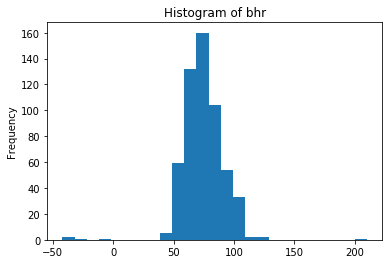

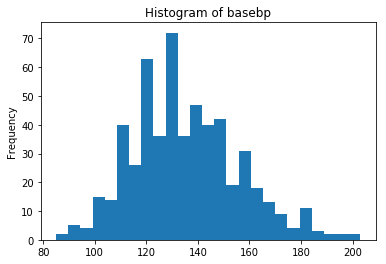

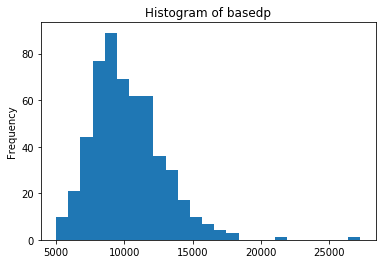

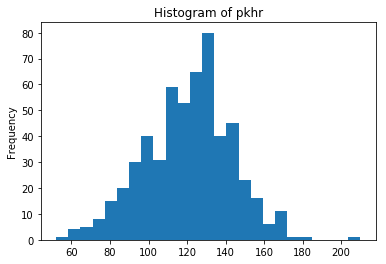

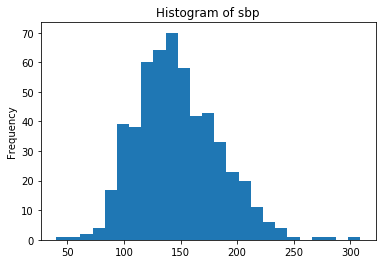

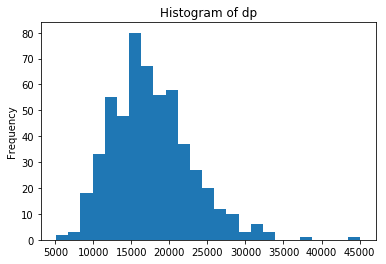

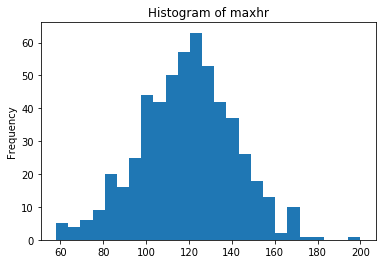

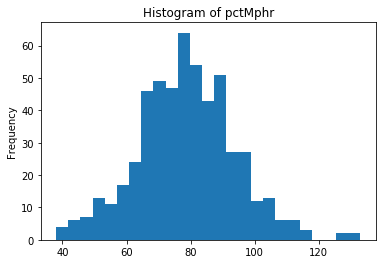

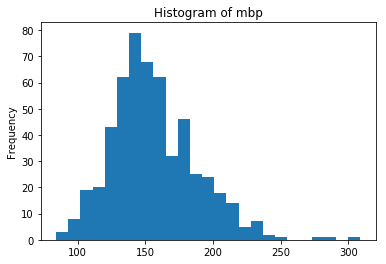

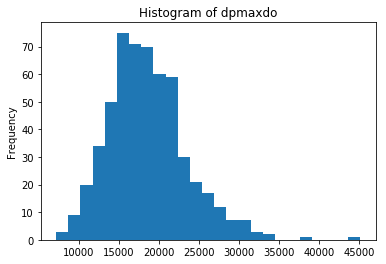

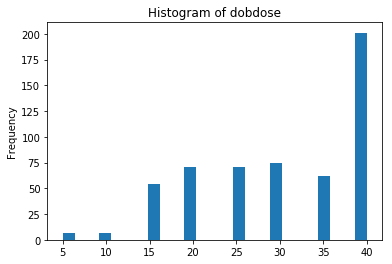

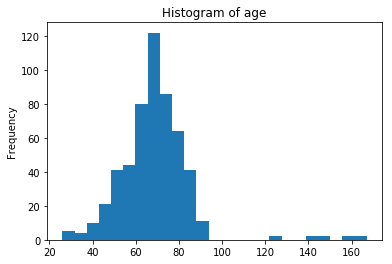

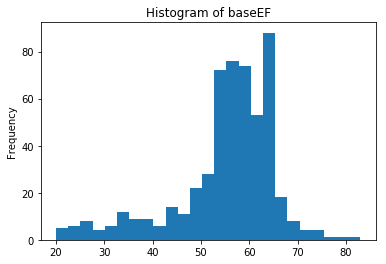

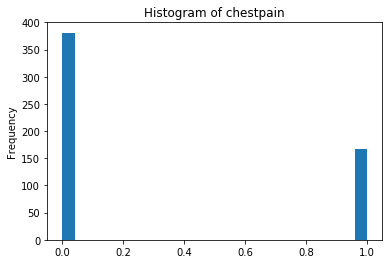

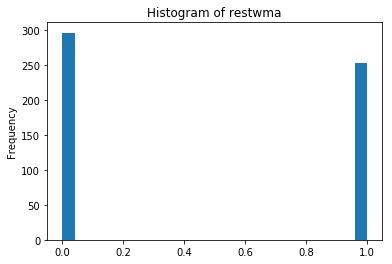

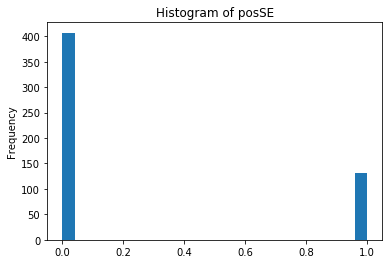

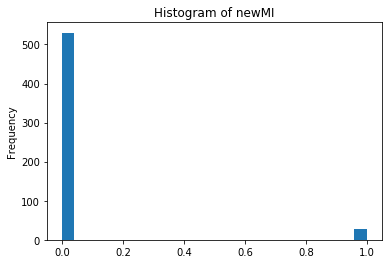

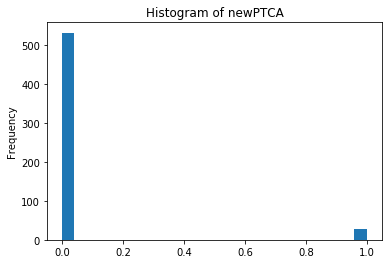

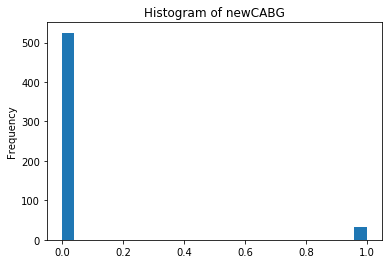

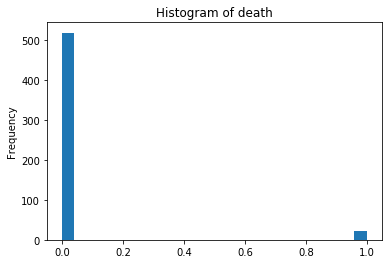

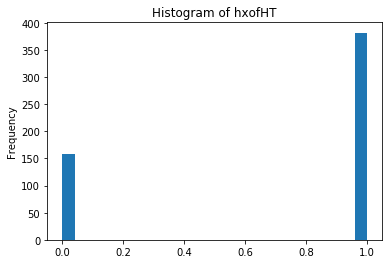

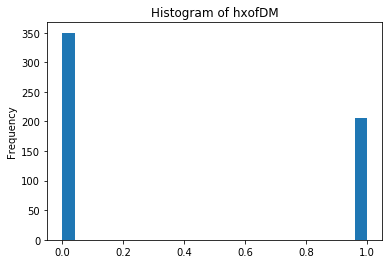

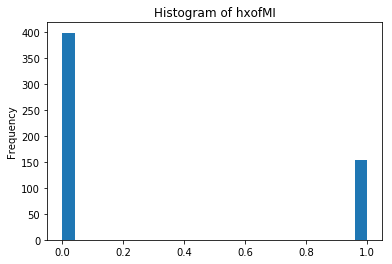

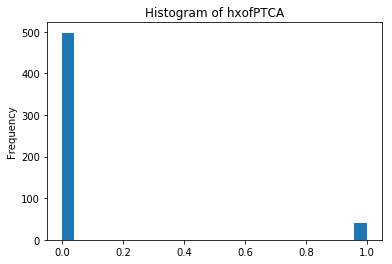

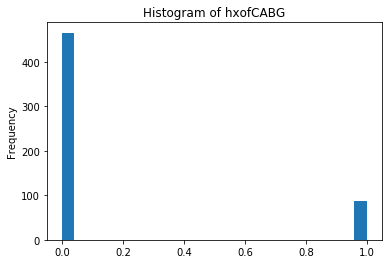

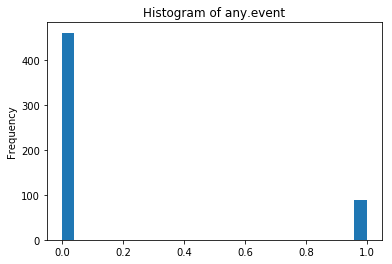

In [44]:
for col,col_type in zip(d.columns, d.dtypes):
    if col_type == "float64":
        plt.figure()
        print(f"Histogram of {col_type} {col}")
        d[col].plot(kind="hist",bins=25)
        plt.title(f"Histogram of {col}")
    if col_type == "int64":
        plt.figure()
        print(f"Histogram of {col_type} {col}")
        d[col].plot(kind="hist",bins=25)
        plt.title(f"Histogram of {col}")
    if col_type == "object":
        print(f"Col {col} has {d[col].nunique()} unique values.")

What do the means look like?

In [45]:
d.mean()

bhr             74.519784
basebp         135.293165
basedp       10223.066298
pkhr           120.643243
sbp            147.035185
dp           17653.733333
maxhr          119.306422
pctMphr         78.561798
mbp            155.615527
dpmaxdo      18547.702899
dobdose         30.237226
age             68.834879
baseEF          55.511111
chestpain        0.304745
restwma          0.460838
posSE            0.244898
newMI            0.050179
newPTCA          0.048387
newCABG          0.059140
death            0.040741
hxofHT           0.706100
hxofDM           0.370504
hxofMI           0.277174
hxofPTCA         0.076067
hxofCABG         0.159132
any.event        0.161818
dtype: float64

Are any of the so-called `double products` wrong?

In [46]:
any(d.basedp != d.bhr * d.basebp)

True

In [47]:
d[d.basedp != d.bhr * d.basebp]

,bhr,basebp,basedp,pkhr,sbp,dp,maxhr,pctMphr,mbp,dpmaxdo,dobdose,age,gender,baseEF,chestpain,restwma,posSE,newMI,newPTCA,newCABG,death,hxofHT,hxofDM,hxofCig,hxofMI,hxofPTCA,hxofCABG,any.event,ecg
PatientIdentifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7eb552972d9be12414ba2043d18a7ace,51.0,NaN,7548.0,123.0,148.0,18204.0,123.0,82.0,148.0,18204.0,NaN,70.0,male,57.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,non-smoker,0.0,0.0,0.0,0.0,normal
250e112653566dc2da8d03e71dc773f6,71.0,123.0,NaN,107.0,140.0,14980.0,108.0,69.0,NaN,16200.0,25.0,64.0,male,59.0,0.0,1.0,0.0,0,0,0,0.0,0.0,1.0,non-smoker,0.0,0.0,0.0,0.0,normal
04b4923e035e2779e7453f2bc1b9c11a,57.0,110.0,NaN,108.0,140.0,15120.0,108.0,62.0,140.0,15120.0,40.0,46.0,male,60.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,non-smoker,0.0,0.0,0.0,0.0,normal
c95cfc9312fd2fbec4bf47921b57f46f,46.0,NaN,6440.0,142.0,170.0,24140.0,142.0,90.0,170.0,24140.0,40.0,62.0,male,62.0,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,non-smoker,0.0,0.0,0.0,0.0,normal
811b8bf9cb39a3c30e36d232310060bc,67.0,137.0,NaN,126.0,181.0,22806.0,126.0,93.0,181.0,22806.0,40.0,85.0,female,55.0,0.0,1.0,0.0,0,0,0,0.0,1.0,1.0,non-smoker,0.0,0.0,0.0,0.0,normal
e536ffe571793e28ed6708cc54b40730,-3.0,161.0,10948.0,107.0,143.0,15301.0,107.0,82.0,143.0,15301.0,25.0,90.0,female,57.0,0.0,1.0,0.0,1,1,0,0.0,1.0,0.0,non-smoker,1.0,0.0,0.0,1.0,normal
be10d61e346cfece160cf5157339e822,78.0,120.0,NaN,123.0,123.0,15129.0,123.0,77.0,123.0,15129.0,40.0,60.0,female,60.0,0.0,1.0,0.0,0,0,0,0.0,1.0,1.0,non-smoker,0.0,0.0,0.0,0.0,normal
5e5da01fe051490bdc5ca368559e7498,78.0,110.0,NaN,125.0,70.0,8750.0,104.0,68.0,100.0,10400.0,NaN,68.0,female,70.0,0.0,1.0,0.0,0,0,0,0.0,1.0,0.0,non-smoker,0.0,0.0,0.0,0.0,normal
ed2e8105e2fd24d62b05ddd9515ac10d,69.0,127.0,NaN,98.0,102.0,9996.0,98.0,65.0,131.0,12838.0,20.0,69.0,female,55.0,1.0,0.0,1.0,0,0,0,0.0,1.0,1.0,non-smoker,0.0,0.0,0.0,0.0,MI


Seems most are wrong because of missing values. We should re-compute them.

In [48]:
d.columns

Index(['bhr', 'basebp', 'basedp', 'pkhr', 'sbp', 'dp', 'maxhr', 'pctMphr',
       'mbp', 'dpmaxdo', 'dobdose', 'age', 'gender', 'baseEF', 'chestpain',
       'restwma', 'posSE', 'newMI', 'newPTCA', 'newCABG', 'death', 'hxofHT',
       'hxofDM', 'hxofCig', 'hxofMI', 'hxofPTCA', 'hxofCABG', 'any.event',
       'ecg'],
      dtype='object')

Of the categorical columns, what are the modes?

In [49]:
categorical_columns = ['gender',
                       'ecg',
                       'chestpain',
                       'restwma',
                       'posSE',
                       'newMI',
                       'newPTCA',
                       'newCABG',
                       'death',
                       'hxofCig',
                       'hxofHT',
                      'hxofDM',
                      'hxofMI',
                      'hxofPTCA',
                      'hxofCABG',
                       'any.event'
                      ]
d[categorical_columns].mode().iloc[0]

gender           female
ecg              normal
chestpain             0
restwma               0
posSE                 0
newMI                 0
newPTCA               0
newCABG               0
death                 0
hxofCig      non-smoker
hxofHT                1
hxofDM                0
hxofMI                0
hxofPTCA              0
hxofCABG              0
any.event             0
Name: 0, dtype: object

In [50]:
numeric_columns = list(set(d.columns) - set(categorical_columns))
numeric_columns

['dp',
 'basebp',
 'dpmaxdo',
 'bhr',
 'pctMphr',
 'maxhr',
 'mbp',
 'age',
 'basedp',
 'sbp',
 'baseEF',
 'dobdose',
 'pkhr']

Is there a gender imabalance?

In [51]:
d['gender'].value_counts()

female    338
male      220
Name: gender, dtype: int64

In [52]:
d['ecg'].value_counts()

normal       311
equivocal    176
MI            71
Name: ecg, dtype: int64

In [53]:
d['hxofCig'].value_counts()

non-smoker    298
moderate      138
heavy         122
Name: hxofCig, dtype: int64

In [54]:
dc = d.fillna(d[categorical_columns].mode().iloc[0])
dc = dc.fillna(d[numeric_columns].mean())

What does the data look like after some basic feature imputation?

In [55]:
dc.describe()

,bhr,basebp,basedp,pkhr,sbp,dp,maxhr,pctMphr,mbp,dpmaxdo,dobdose,age,baseEF,chestpain,restwma,posSE,newMI,newPTCA,newCABG,death,hxofHT,hxofDM,hxofMI,hxofPTCA,hxofCABG,any.event
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,74.519784,135.293165,10223.066298,120.643243,147.035185,17653.733333,119.306422,78.561798,155.615527,18547.702899,30.237226,68.834879,55.511111,0.299283,0.453405,0.236559,0.050179,0.048387,0.059140,0.039427,0.715054,0.369176,0.274194,0.073477,0.157706,0.159498
std,17.590534,20.762192,2553.731480,22.523132,36.085236,5157.104510,21.756273,14.895535,31.211850,4885.634142,9.457375,15.976324,10.251149,0.458355,0.498271,0.425351,0.218510,0.214775,0.236098,0.194782,0.451794,0.483015,0.446507,0.261151,0.364792,0.366469
min,-42.000000,85.000000,5000.000000,52.000000,40.000000,5100.000000,58.000000,38.000000,84.000000,7130.000000,5.000000,26.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,120.000000,8467.000000,107.000000,122.000000,14220.000000,105.000000,70.000000,134.000000,15261.000000,25.000000,61.000000,52.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.000000,133.000000,9940.500000,122.000000,143.000000,17243.000000,120.000000,78.561798,151.000000,18202.000000,30.000000,68.917440,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84.000000,150.000000,11652.000000,135.000000,170.000000,20568.000000,133.000000,88.000000,174.000000,21197.500000,40.000000,76.000000,62.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,210.000000,203.000000,27300.000000,210.000000,309.000000,45114.000000,200.000000,133.000000,309.000000,45114.000000,40.000000,167.000000,83.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Double check some numbers after imputation:

In [56]:
dc['any.event'].value_counts()

0.0    469
1.0     89
Name: any.event, dtype: int64

In [57]:
dc['any.event'].value_counts()

0.0    469
1.0     89
Name: any.event, dtype: int64

In [58]:
dc['gender'].value_counts()

female    338
male      220
Name: gender, dtype: int64

In [59]:
d['gender'].value_counts()

female    338
male      220
Name: gender, dtype: int64

What is the death event breakdown by gender? 

In [60]:
d.groupby(by='gender')['any.event'].value_counts()

gender  any.event
female  0.0          287
        1.0           46
male    0.0          174
        1.0           43
Name: any.event, dtype: int64

"Binary-ize" the data to get ride of categorical columns.

In [61]:
dcd = pd.get_dummies(dc)

In [62]:
targets = ['any.event','death','newMI','newPTCA','newCABG']

In [63]:
dcd.columns

Index(['bhr', 'basebp', 'basedp', 'pkhr', 'sbp', 'dp', 'maxhr', 'pctMphr',
       'mbp', 'dpmaxdo', 'dobdose', 'age', 'baseEF', 'chestpain', 'restwma',
       'posSE', 'newMI', 'newPTCA', 'newCABG', 'death', 'hxofHT', 'hxofDM',
       'hxofMI', 'hxofPTCA', 'hxofCABG', 'any.event', 'gender_female',
       'gender_male', 'hxofCig_heavy', 'hxofCig_moderate',
       'hxofCig_non-smoker', 'ecg_MI', 'ecg_equivocal', 'ecg_normal'],
      dtype='object')

Let's take a stab at a classifier!

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = dcd[list(set(dcd.columns) - set(targets))]
y = dcd['any.event']

Let's not forget about those negative heartrates!

In [65]:
X = X.clip(lower=0)

In [66]:
X.shape

(558, 29)

In [67]:
dcd.shape

(558, 34)

What does Chi^2 tests show are the features that are non-indepenant of the target?

In [68]:
skb = SelectKBest(chi2, k=5).fit(X, y)

Print the feature p-values.

In [69]:
for name, p in zip(list(set(dcd.columns) - set(targets)),skb.pvalues_):
    print(f"{name} - {p}")

posSE - 1.2519223476031758e-08
hxofDM - 0.03396496850391589
hxofPTCA - 0.29393166837867374
basebp - 0.15544896147150228
maxhr - 0.002270952354540718
baseEF - 8.452047576359007e-13
hxofCig_non-smoker - 0.3815757561923494
ecg_equivocal - 0.5466038370530005
ecg_normal - 0.02371346544800147
dpmaxdo - 0.0
bhr - 0.9376193256648961
chestpain - 0.1786365083597644
mbp - 0.002502233615202182
age - 0.02863980268078268
ecg_MI - 0.00015404320975145338
gender_female - 0.23993552263257567
restwma - 1.3407846394330313e-05
pkhr - 0.0001600966852160144
dp - 0.0
gender_male - 0.14522751494533803
hxofCig_moderate - 0.8180957722377636
hxofMI - 0.0002476914101283388
hxofCig_heavy - 0.2614753673690545
pctMphr - 0.10931970996629083
hxofCABG - 0.08248551702682552
dobdose - 0.001486205431103295
basedp - 1.281630180102249e-162
sbp - 2.0303339887545705e-07
hxofHT - 0.12035358384333882


Oh right, p-values are awful. Let's look at the Chi^2 test metric.

In [70]:
best_features = pd.DataFrame({'score':skb.scores_, 'pv':skb.pvalues_, 'col':list(set(dcd.columns) - set(targets))})

In [71]:
best_features.sort_values(by='score',ascending=False)

,score,pv,col
18,8681.510010,0.000000e+00,dp
9,5496.595736,0.000000e+00,dpmaxdo
26,738.482425,1.281630e-162,basedp
5,51.174241,8.452048e-13,baseEF
0,32.404562,1.251922e-08,posSE
27,27.004014,2.030334e-07,sbp
16,18.951576,1.340785e-05,restwma
14,14.322131,1.540432e-04,ecg_MI
17,14.249578,1.600967e-04,pkhr
21,13.429551,2.476914e-04,hxofMI


:thinkingface: I'm no medical doctor, so hard to tell if this is reasonable or not.

What's the relationship between the features?

Text(0.5,1,'Chi2 dim. red')

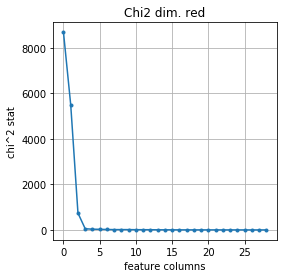

In [72]:
plt.figure(1, figsize=(4, 4))
best_features.sort_values(by='score',ascending=False).reset_index()['score'].plot(kind='line',marker='.')
plt.grid()
plt.axis('tight')
plt.xlabel('feature columns')
plt.ylabel('chi^2 stat')
plt.title('Chi2 dim. red')

Ok, so mayb Chi2 is misleading. Let's try PCA.

In [73]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [74]:
logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


Text(0.5,1,'PCA dim. red.')

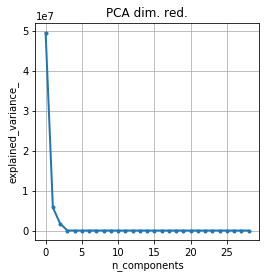

In [75]:
pca.fit(X)

plt.figure(1, figsize=(4, 4))
plt.plot(pca.explained_variance_, linewidth=2,marker='.')
plt.grid()
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.title('PCA dim. red.')

Innnteresting, PCA and Chi2 lead to similar results on the number of dimensions needed. THat's good.

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

[]

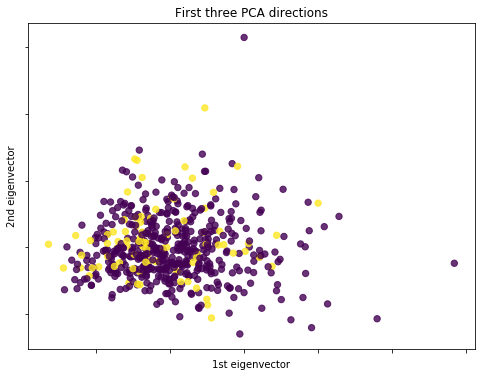

In [80]:
fig = plt.figure(1, figsize=(8, 6))
ax = plt.gca()
X_reduced = PCA(n_components=2).fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, alpha=0.8)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])

Ugh. That's a horrible plot.

In [81]:
# Split data into test/train

In [82]:
y.mean()

0.15949820788530467

Ok, let's try L1 regularization with a classifier to see what happens.

In [83]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=134)

In [84]:
X.shape

(558, 29)

In [85]:
y_train.value_counts()

0.0    351
1.0     67
Name: any.event, dtype: int64

In [86]:
y_test.value_counts()

0.0    118
1.0     22
Name: any.event, dtype: int64

Assert we aren't skewing the data!

In [87]:
# Assert that test and train have the same ratio of death events
round(y_test.mean(),2) == round(y_train.mean(),2)

True

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [91]:
ss = StandardScaler()
lr = LogisticRegression(penalty='l1',class_weight='balanced',solver='liblinear',)

pipe = Pipeline(steps = [
    ('reduce_dim', SelectKBest(chi2)),
    ('scaler', ss),
    ('logistic', lr)
])

In [92]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('reduce_dim', SelectKBest(k=10, score_func=<function chi2 at 0x1a16d4fd90>)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [95]:
pipe.steps[2][1].coef_

array([[ 0.60466194,  0.        , -0.24528605, -0.29175254, -0.28266855,
        -0.14337399,  0.16894196,  0.30950357, -0.14996417,  0.08932834]])

If we were hoping for an excellent classifier, we haven't got it yet.

In [98]:
cross_val_score(estimator=pipe, X=X_train, y=y_train, scoring='roc_auc', cv=5, n_jobs=-1)

array([0.72837022, 0.77244898, 0.72527473, 0.7043956 , 0.72747253])

In [99]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform


Let's try a better search space, and optimize for recall.

In [100]:
param_grid = dict(reduce_dim__k=sp_randint(4,29),
                  logistic__C=uniform(loc=0, scale=4),
                  logistic__penalty=['l1','l2'])

grid_search = RandomizedSearchCV(pipe, scoring='recall',param_distributions=param_grid,n_iter=1000, cv=5, verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('reduce_dim', SelectKBest(k=10, score_func=<function chi2 at 0x1a16d4fd90>)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=1000, n_jobs=-1,
          param_distributions={'reduce_dim__k': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a163dbe48>, 'logistic__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a163dbeb8>, 'logistic__penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='recall', verbose=0)

In [101]:
grid_search.best_params_

{'logistic__C': 0.06111661494246423,
 'logistic__penalty': 'l1',
 'reduce_dim__k': 9}

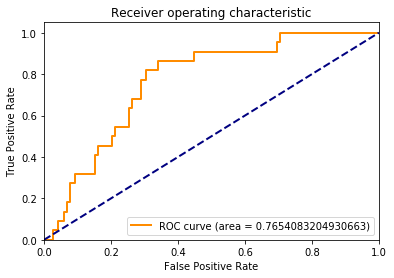

0.7654083204930663

In [102]:
plot_roc(grid_search.predict_proba(X_test), y_test)

In [103]:
y_hat = pipe.predict_proba(X_test)

What's an ugly ROC.

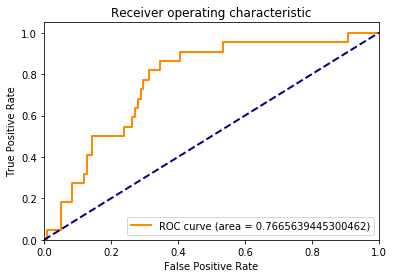

0.7665639445300462

In [104]:
plot_roc(y_hat,y_test)

At least the performance is consistent.

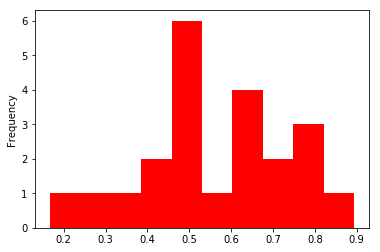

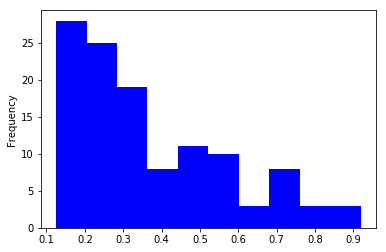

In [105]:
scores = pd.DataFrame({'scores':y_hat[:,1], 'labels': y_test})
plt.figure()
scores[scores['labels'] == 1.0]['scores'].plot(kind='hist',color='r')
plt.figure()
scores[scores['labels'] == 0.0]['scores'].plot(kind='hist',color='b')

Generally the bad out comes have higher probabilities than the non-bad outcomes. That's good.

In [26]:
def plot_roc(y_hat, y):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    
    fpr, tpr, thresholds = roc_curve(y_test, y_hat[:,1], pos_label=1)
    roc_auc = roc_auc_score(y_test, y_hat[:,1])
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label=f'ROC curve (area = {roc_auc:2})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return roc_auc